# ZeissReader Demo

## Data format: .txrm file

## CIL Version

This notebook was developed using CIL v25.0.0

## Dataset
The data is available from: https://zenodo.org/records/14993402

Update this filepath to where you have saved the dataset:

In [62]:
file_path = '../Data/bin/seed_res2_bin.txrm'

## Loading Geometry

In [63]:
from cil.io import ZEISSDataReader

from cil.utilities.display import show2D, show_geometry

In [64]:
reader = ZEISSDataReader(file_path)

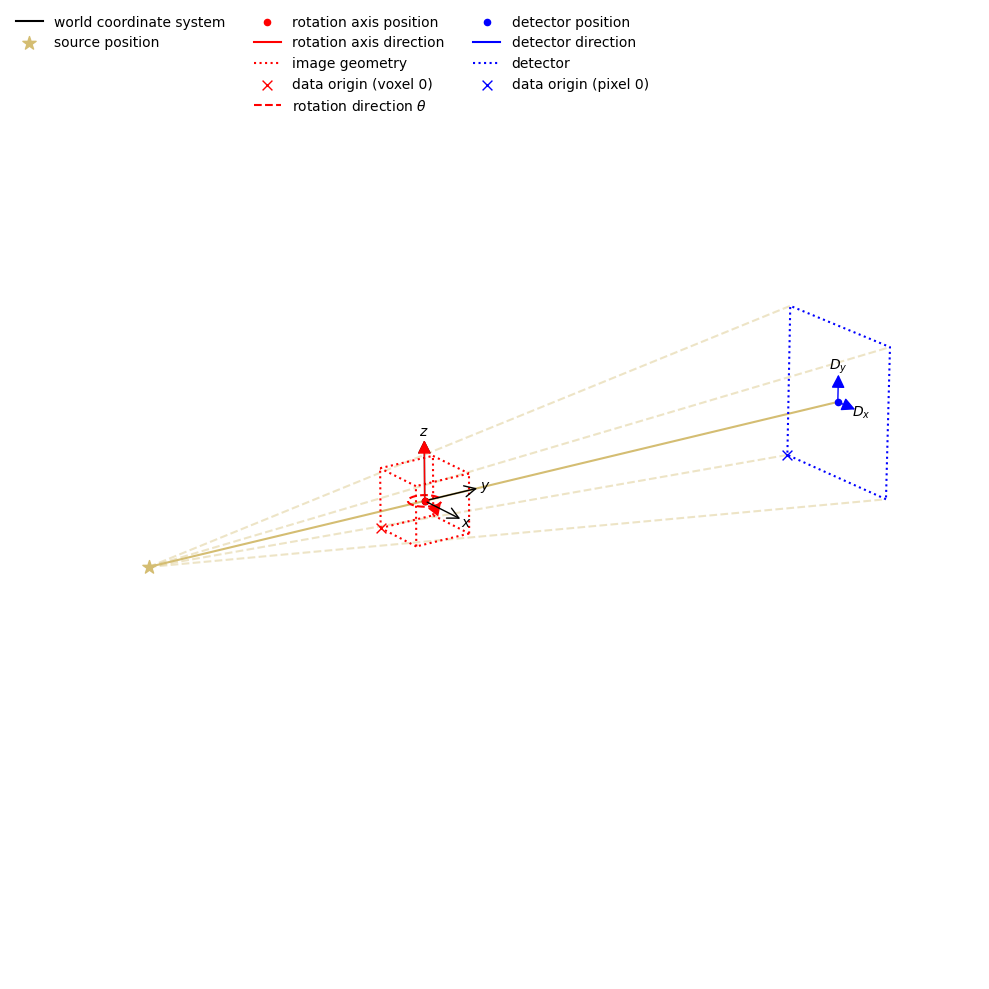

In [65]:
acq_geom = reader.get_geometry()

show_geometry(acq_geom);

In [66]:
print(acq_geom)

3D Cone-beam tomography
System configuration:
	Source position: [  0.       , -13.0246582,   0.       ]
	Rotation axis position: [0., 0., 0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [ 0.        , 21.25524902,  0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1013 1013]
	Pixel size: [0.00670058 0.00670058]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 1561
	Angles 0-9 in radians: [-3.1415665, -3.1375852, -3.1336646, -3.1295855, -3.1255407, -3.121523 ,
 -3.1175013, -3.1134663, -3.1094341, -3.105374 ]
	Angles 1551-1560 in radians: [3.1052568, 3.1092806, 3.1133163, 3.1173456, 3.1213562, 3.125383 ,
 3.1294239, 3.1334474, 3.1375027, 3.1415982]
	Full angular array can be accessed with acquisition_data.geometry.angles
Distances in units: units distance


## Loading Projections


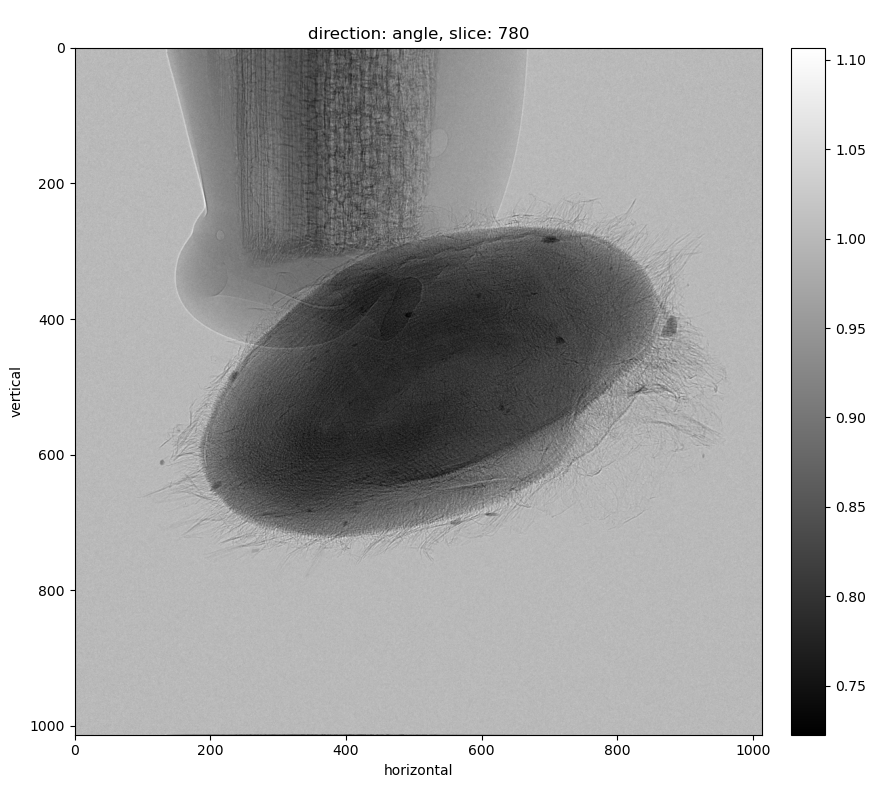

In [74]:
data = reader.read()
show2D(data, origin='upper-left');

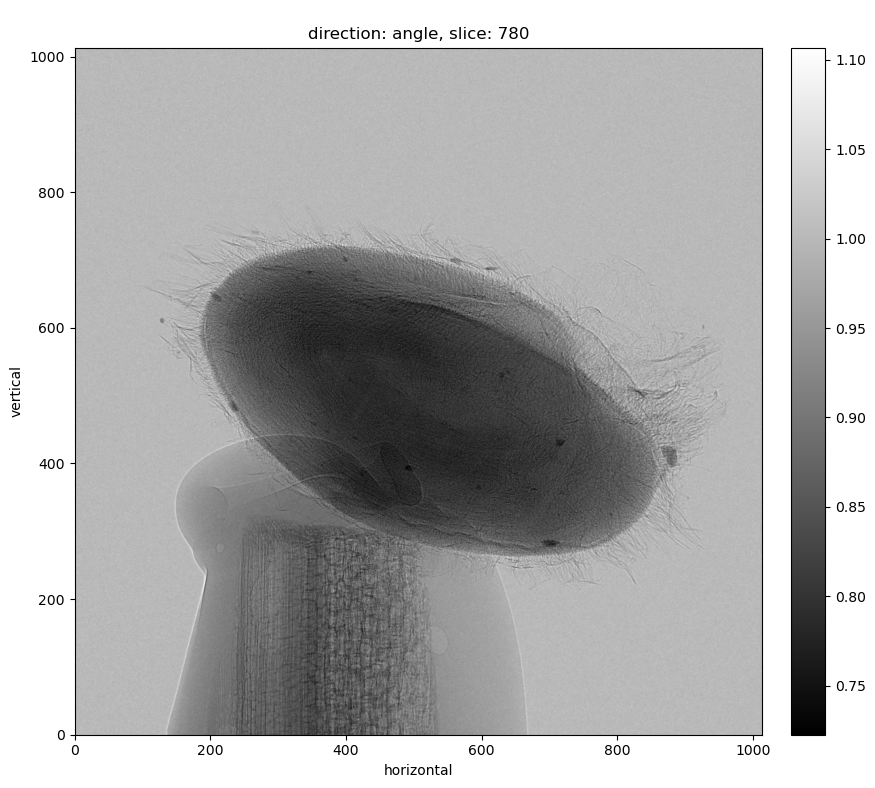

In [75]:
import numpy as np

data.geometry.set_angles(data.geometry.angles, initial_angle=-45*np.pi/180, angle_unit='radian')

show2D(data)

# Pre-processing and Reconstruction

In [76]:
from cil.processors import CentreOfRotationCorrector, TransmissionAbsorptionConverter
from cil.recon import FDK

data_exp = TransmissionAbsorptionConverter()(data, out=data)

data_cor = CentreOfRotationCorrector.image_sharpness(backend="tigre")
data_cor.set_input(data_exp)

corrected_data = data_cor.get_output()

#defining img geometry and reducing size
ig = corrected_data.geometry.get_ImageGeometry()
ig.voxel_num_y = 500

recon = FDK(corrected_data, image_geometry=ig)
recon = recon.run()

FDK recon

Input Data:
	angle: 1561
	vertical: 1013
	horizontal: 1013

Reconstruction Volume:
	vertical: 1013
	horizontal_y: 500
	horizontal_x: 1013

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



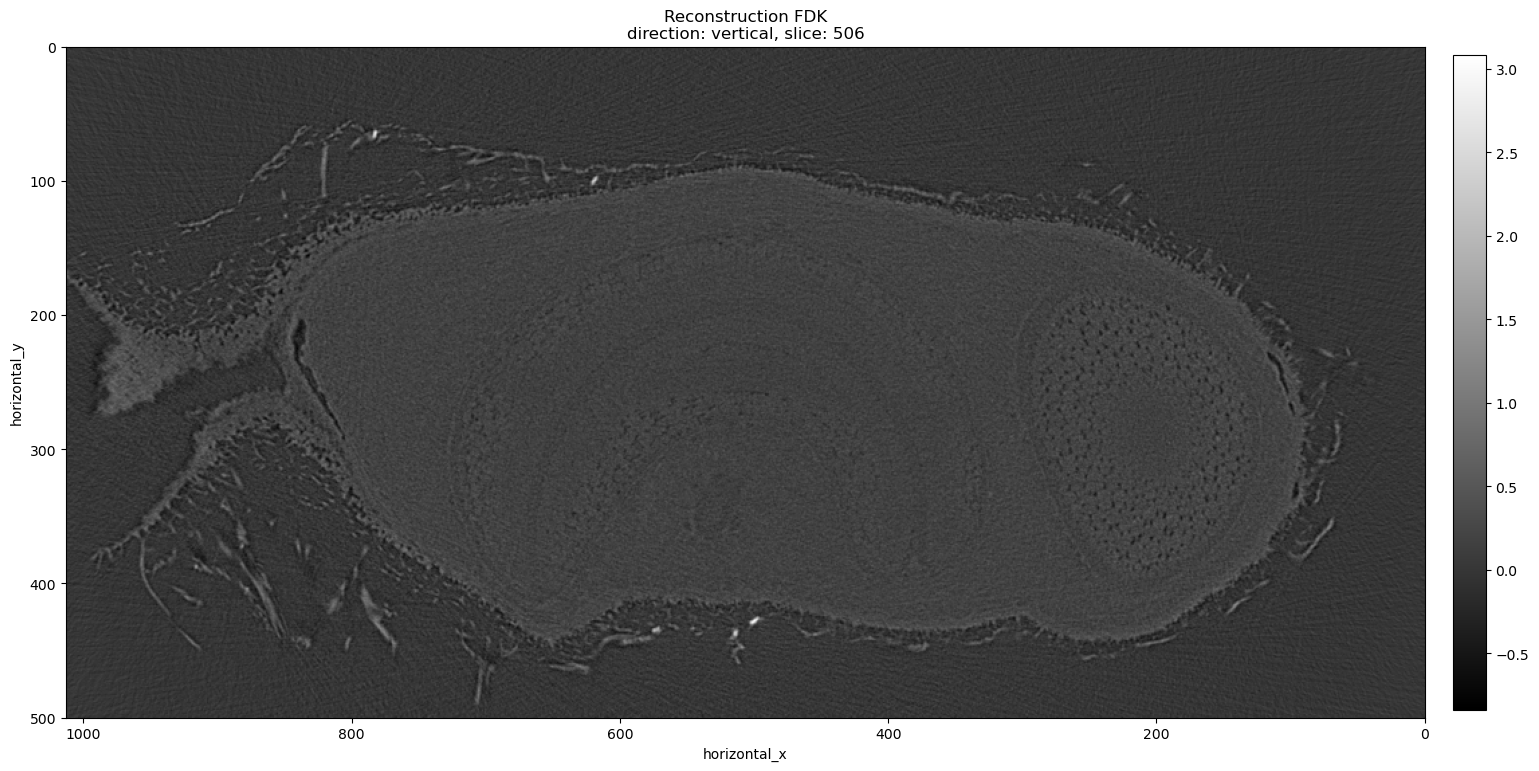

In [77]:
show2D(recon, title='Reconstruction FDK',  origin='upper-right');